# Efficient Frontier

Using 30 industry data from Ken French research site https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

In [14]:
import pandas as pd
ind = pd.read_csv(".\data/ind30_m_vw_rets.csv", header=0, index_col=0)/100
ind.index = pd.to_datetime(ind.index,format = "%Y%M").to_period("M")

ind.columns = ind.columns.str.strip()
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [15]:
def get_ind_returns():
    """
    Load and format the Ken French 30 Industry Portfolios Value Weighted Monthly Returns
    """
    ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0)/100
    ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')
    ind.columns = ind.columns.str.strip()
    return ind

get_ind_returns()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,-0.0038,-0.0186,-0.0543,0.0289,-0.0447,0.0254,0.0526,0.0446,0.0001,0.0380,...,0.0295,0.0524,0.0993,-0.0034,0.0291,0.0366,0.0911,0.0364,0.0245,0.0299
2018-09,-0.0032,0.0019,0.0537,-0.0009,-0.0221,0.0107,0.0130,0.0199,-0.0287,-0.0638,...,0.0174,-0.0037,-0.0033,-0.0030,0.0105,-0.0148,0.0061,0.0251,-0.0193,0.0116
2018-10,0.0102,-0.0157,0.0790,-0.1596,-0.0666,-0.0051,-0.1014,-0.0884,-0.1250,-0.2579,...,-0.0050,-0.0920,-0.0806,-0.0982,-0.0975,-0.0788,-0.1021,-0.0171,-0.0545,-0.0599
2018-11,0.0272,0.0579,-0.0843,-0.0065,0.0325,0.0644,-0.0099,0.0632,0.0496,0.0292,...,0.0254,0.0129,-0.0505,0.0822,0.0617,0.0318,0.0159,0.0616,0.0289,0.0348


In [21]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import risk_kit as rk
rk.get_ind_returns()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,-0.0038,-0.0186,-0.0543,0.0289,-0.0447,0.0254,0.0526,0.0446,0.0001,0.0380,...,0.0295,0.0524,0.0993,-0.0034,0.0291,0.0366,0.0911,0.0364,0.0245,0.0299
2018-09,-0.0032,0.0019,0.0537,-0.0009,-0.0221,0.0107,0.0130,0.0199,-0.0287,-0.0638,...,0.0174,-0.0037,-0.0033,-0.0030,0.0105,-0.0148,0.0061,0.0251,-0.0193,0.0116
2018-10,0.0102,-0.0157,0.0790,-0.1596,-0.0666,-0.0051,-0.1014,-0.0884,-0.1250,-0.2579,...,-0.0050,-0.0920,-0.0806,-0.0982,-0.0975,-0.0788,-0.1021,-0.0171,-0.0545,-0.0599
2018-11,0.0272,0.0579,-0.0843,-0.0065,0.0325,0.0644,-0.0099,0.0632,0.0496,0.0292,...,0.0254,0.0129,-0.0505,0.0822,0.0617,0.0318,0.0159,0.0616,0.0289,0.0348


<AxesSubplot:>

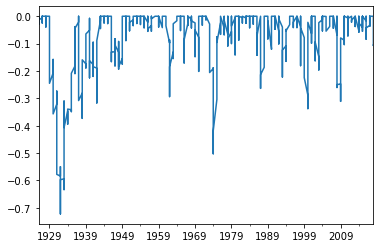

In [18]:
rk.drawdown(ind["Food"])["Drawdown"].plot.line()

In [24]:
rk.var_gaussian(ind[["Food", "Beer", "Smoke"]], modified=True)

Food     0.061207
Beer     0.033881
Smoke    0.080292
dtype: float64

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

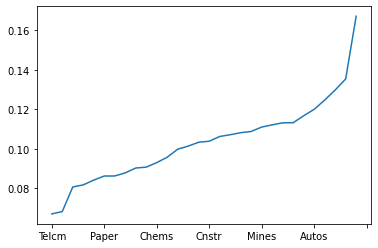

In [33]:
rk.var_gaussian(ind).sort_values().plot().bar()

### Sharpe ratio of returns

In [35]:
rk.sharpe_ratio(ind, 0.03, 12).sort_values()

Coal     0.084275
Steel    0.126052
Whlsl    0.143494
Other    0.160862
Mines    0.177109
Books    0.192686
Games    0.194420
Txtls    0.194906
Trans    0.214624
Autos    0.227548
Cnstr    0.229351
FabPr    0.265297
Servs    0.267263
Fin      0.282243
Carry    0.285916
ElcEq    0.293063
Clths    0.293105
Util     0.306945
Hshld    0.307349
Oil      0.330358
Meals    0.332717
BusEq    0.342974
Chems    0.344903
Beer     0.351780
Rtail    0.364325
Paper    0.364722
Telcm    0.383294
Hlth     0.437783
Smoke    0.446361
Food     0.454770
dtype: float64

<AxesSubplot:title={'center':'Industry Sharpe Ratios 1926-2018'}>

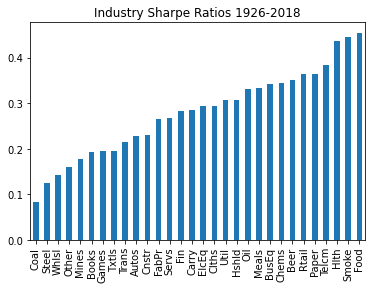

In [36]:
rk.sharpe_ratio(ind, 0.03, 12).sort_values().plot.bar(title="Industry Sharpe Ratios 1926-2018")

<AxesSubplot:title={'center':'Industry Sharpe Ratios since 2000'}>

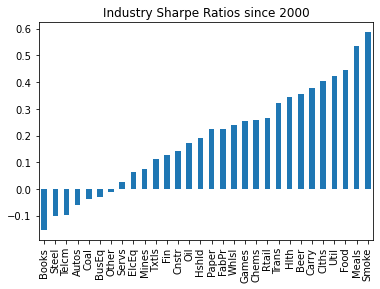

In [38]:
rk.sharpe_ratio(ind["2000":], 0.03, 12).sort_values().plot.bar(title='Industry Sharpe Ratios since 2000')

### Expected returns and Covariance

<AxesSubplot:>

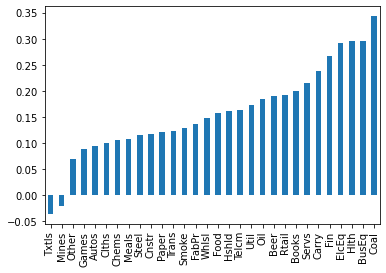

In [42]:
er = rk.annualize_rets(ind["1995":"2000"], 12)
er.sort_values().plot.bar()

## Plotting the efficient frontier

### Volatility of Portfolio

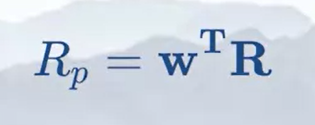

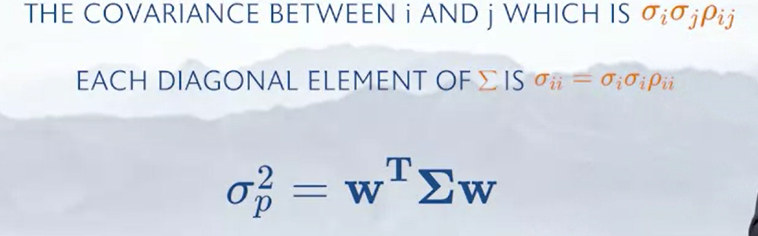

Plotting a efficient frontier by starting with minimum return and maximum return while splitting the rmin and rmax into a grid and running the optimizer to find weights of the portfolio where you can get minimum voaltility for a given level of returns

Below is the equation for optimization 

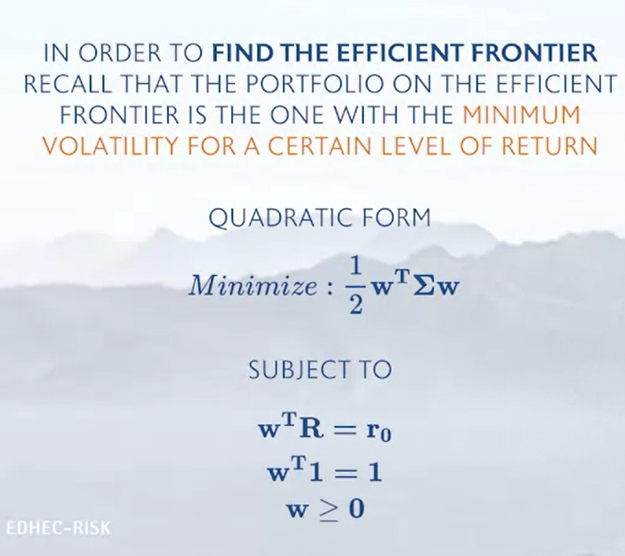

In [60]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import risk_kit as rk

ind = rk.get_ind_returns()
er = rk.annualize_rets(ind["1996":"2000"],12)
cov = ind["1996":"2000"].cov()
l = ["Food", "Beer", "Smoke", "Coal"]
cov.loc[l,l]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [73]:
##  returns of a porflio

def portfolio_return(weights, returns):
    return weights.T @ returns


## voaltility of portfoio 

def portfolio_vol(weights,covmat):
    """
    covmat: covriance matrix of asset clasess in a portfolio
    """
    return (weights.T @ covmat @ weights)**0.5
    

In [74]:
import pandas as pd
import numpy as np
ew = np.repeat(0.25, 4)
l = ["Food", "Beer", "Smoke", "Coal"]
rk.portfolio_return(ew, er[l])
rk.portfolio_vol(ew,cov.loc[l,l])

0.055059195776437045

## Finding efficient frontier for 2 asset portfolio

1. Generating series of weights basis no of points we want to check mean covariance relation
2. simulate returns and voaltility of these weights for a hypothetical portfolio ["Game","Fin"]
3. Plot the returns and volatility for this hypothetical portfolio

<AxesSubplot:xlabel='V', ylabel='R'>

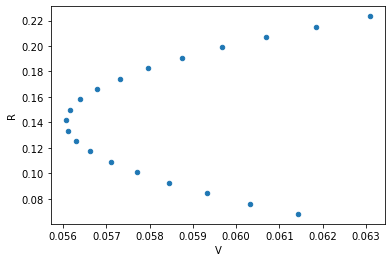

In [72]:
import numpy as np

## Generating weights
n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]

l= ["Games","Fin"]
rets = [rk.portfolio_return(w,er[l]) for w in weights]
vols = [rk.portfolio_vol(w,cov.loc[l,l]) for w in weights]
ef = pd.DataFrame({"R":rets , "V":vols})
ef.plot.scatter(x="V",y="R")

# make a function out of this block - plot_ef2

<AxesSubplot:xlabel='Volatility'>

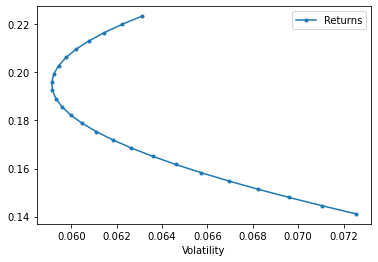

In [75]:
l = ["Fin", "Beer"]
rk.plot_ef2(25, er[l].values, cov.loc[l,l])

## Multi Asset efficient portfolio

In [77]:
def plot_ef(n_points,er,cov):
    """
    Plots multiasset efficient frontier
    """
    weights = optimal_weights(n_points, er, cov)
    ## implement oprtimal_weights(n_points,er,cov) that will minimize volatility in the end
    rets = [rk.portfolio_return(w,er) for w in weights]
    vols = [rk.portfolio_vol(w,cov) for w in weights]
    ef = pd.DataFrame({"Returns":rets , "Volatility":vols})
    return ef.plot.scatter(x="Voaltility",y="Returns",style=".-")


In [83]:
from scipy.optimize import minimize

def minimize_vol(target_return,er,cov):
    """
    Returns optimal weights that can minimize the volatility for a given level of returns
    We use optimize function from scipy library 
    """
    n = er.shape[0]
    b = ((0.0,1.0),)*n
    init_guess = np.repeat(1/n,n)
    weight_sum_to_1 = {
        "type" : "eq",
        "fun" : lambda weights : np.sum(weights) - 1
    }
    return_is_target =  {
        "type":"eq",
        "fun" : lambda weights : rk.portfolio_return(weights,er) - target_return,
        "agrs" : (er,)
    }
    
    weights = minimize(rk.portfolio_vol,init_guess,args = (cov,) , 
                      method = "SLSQP",bounds = b,options = {"disp":False},
                      constraints = (weight_sum_to_1,return_is_target))
    return weights.x



<AxesSubplot:xlabel='Volatility'>

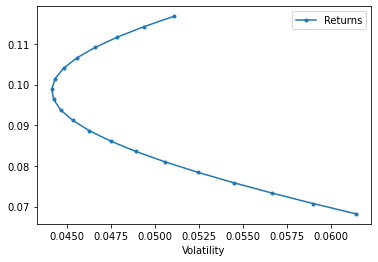

In [86]:
l= ["Food","Games"]
rk.plot_ef2(20,er[l],cov.loc[l,l])

In [92]:
weights = rk.minimize_vol(0.1,er[l],cov.loc[l,l])
rk.portfolio_vol(weights,cov.loc[l,l])

# this matches the 0.045 roughly in the graph 

0.044167157733239884

Now that our optimizer is working so now we can plot the efficient frontier nby dividing the range of max and min returns in portfolio and get weights of portfolio that can minimize the volatility

In [93]:
def optimal_weights(n_points,er,cov):
    
    target_rs = np.linspace(er.min(),er.max(),n_points)
    weights = [rk.minimize_vol(target,er,cov) for target in target_rs]
    return weights

# Plot ef is completed from this implementation




<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

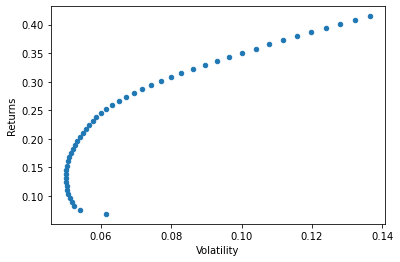

In [95]:
l = ["Smoke", "Fin", "Games", "Coal"]
rk.plot_ef(50, er[l], cov.loc[l,l])